In [2]:
!pip install numpy astropy matplotlib scipy sunpy
!pip install sunkit-image
!pip install aiapy
from astropy import units as u
from astropy.coordinates import SkyCoord
import sunpy.map
from sunpy.net import Fido, attrs as a
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, AsinhStretch
from sunpy.visualization.colormaps import cm
from matplotlib.patches import Rectangle
from reproject import reproject_interp
import matplotlib
from IPython.display import HTML
from sunkit_image import trace
from aiapy.calibrate import register, update_pointing
from aiapy.calibrate.util import get_pointing_table
from matplotlib.patches import Polygon
from glob import glob
import os
from astropy.io import fits
from astropy.wcs import WCS
import sunpy.map
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord, SkyOffsetFrame
import astropy.units as u
from sunpy.net.jsoc import JSOCClient
from sunpy.net import attrs as a
from astropy.time import Time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.0 MB/s eta 0:00:00


INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T094643Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T094907Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T095155Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T095443Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T095707Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

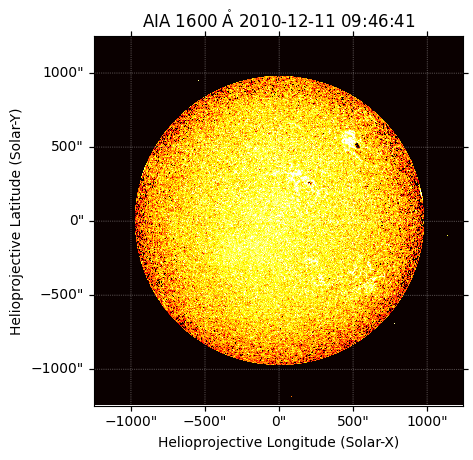

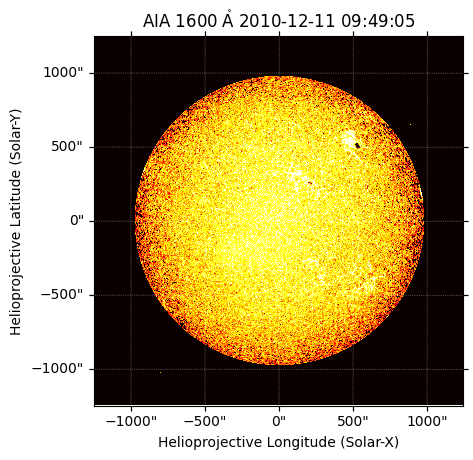

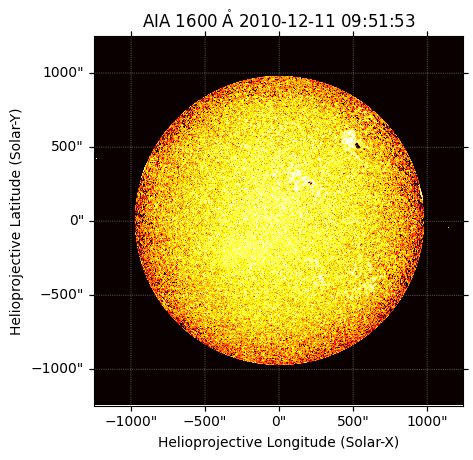

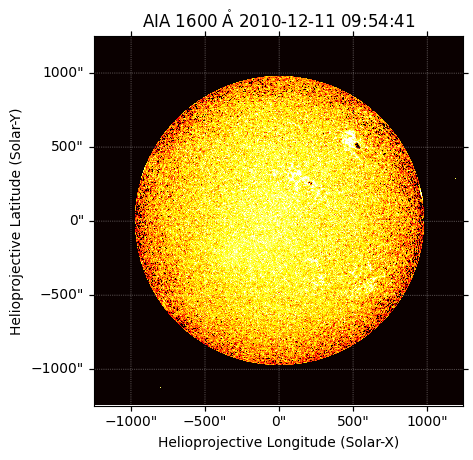

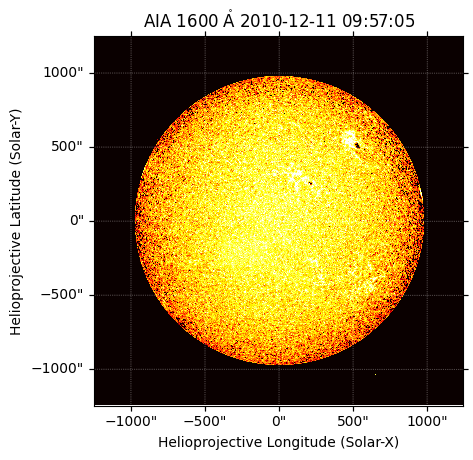

In [2]:
client = JSOCClient()
flash_times = [
    "2010-12-11T09:46:41",
    "2010-12-11T09:49:05",
    "2010-12-11T09:51:53",
    "2010-12-11T09:54:41",
    "2010-12-11T09:57:05",
]

from sunpy.net.jsoc.attrs import Series, Notify, Segment

for flash_time in flash_times:
    result = client.search(
        a.Time(flash_time, flash_time),
        Series("aia.lev1_uv_24s"),
        a.Wavelength(1600 * u.angstrom),
        Segment("image"),
        Notify("yadav23@iiserb.ac.in")
    )

    if not result:
        print(f"No exact data for {flash_time}")
        continue

    downloaded_file = client.fetch(result)

    if not downloaded_file:
        print(f"Failed to download file for {flash_time}")
        continue

    hdul = fits.open(downloaded_file[0])
    hdul[1].verify('fix')
    data = hdul[1].data
    header = hdul[1].header

    header['CUNIT1'] = 'arcsec'
    header['CUNIT2'] = 'arcsec'

    if 'WAVELNTH' not in header:
        header['WAVELNTH'] = 131
    header['WAVEUNIT'] = 'angstrom'

    header['DATE-OBS'] = flash_time
    header['T_OBS'] = flash_time

    header['CRPIX1'] = 2053.199951
    header['CRPIX2'] = 2043.339966
    header['CRVAL1'] = 0.000000
    header['CRVAL2'] = 0.000000
    header['CDELT1'] = 0.609373
    header['CDELT2'] = 0.609373

    data_2d = data

    aia_map = sunpy.map.Map(data_2d, header)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection=aia_map)
    aia_map.plot(cmap='hot', vmin=99, vmax=470)

    rotation_angle = 0 * u.deg
    center_coord = SkyCoord(207 * u.arcsec, 251 * u.arcsec, frame=aia_map.coordinate_frame)
    width = 3.5 * u.arcsec
    height = 5 * u.arcsec
    offset_frame = SkyOffsetFrame(origin=center_coord, rotation=rotation_angle)
    rectangle = SkyCoord(lon=[-1/2, 1/2] * width, lat=[-1/2, 1/2] * height, frame=offset_frame)

    aia_map.draw_quadrangle(
        rectangle,
        axes=ax,
        edgecolor="white",
        linestyle="-",
        linewidth=1.5,
    )

In [5]:
from sunpy.net.jsoc.attrs import Series, Notify, Segment
import os
client = JSOCClient()
flash_times = [
    "2010-12-11T09:46:41",
    "2010-12-11T09:49:05",
    "2010-12-11T09:51:53",
    "2010-12-11T09:54:41",
    "2010-12-11T09:57:05",
]

output_dir = "flash_fits_files"
os.makedirs(output_dir, exist_ok=True)

for flash_time in flash_times:
    result = client.search(
        a.Time(flash_time, flash_time),
        Series("aia.lev1_uv_24s"),
        a.Wavelength(1600 * u.angstrom),
        Segment("image"),
        Notify("yadav23@iiserb.ac.in")
    )

    if not result:
        print(f"No exact data for {flash_time}")
        continue

    downloaded_file = client.fetch(result)

    if not downloaded_file:
        print(f"Failed to download file for {flash_time}")
        continue

    # Save with clean time-based filename
    save_path = os.path.join(output_dir, f"{flash_time}.fits")
    os.rename(downloaded_file[0], save_path)
    print(f"Saved {save_path}")


INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T094643Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

Saved flash_fits_files/2010-12-11T09:46:41.fits


INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T094907Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

Saved flash_fits_files/2010-12-11T09:49:05.fits


INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T095155Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

Saved flash_fits_files/2010-12-11T09:51:53.fits


INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T095443Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

Saved flash_fits_files/2010-12-11T09:54:41.fits


INFO:sunpy:1 URLs found for download. Full request totaling 10MB


INFO: 1 URLs found for download. Full request totaling 10MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_uv_24s.2010-12-11T095707Z.1600.image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

Saved flash_fits_files/2010-12-11T09:57:05.fits


INFO:sunpy:Using mesh-based autoalignment


INFO: Using mesh-based autoalignment [sunpy.map.mapbase]


INFO:sunpy:Using mesh-based autoalignment


INFO: Using mesh-based autoalignment [sunpy.map.mapbase]


INFO:sunpy:Using mesh-based autoalignment


INFO: Using mesh-based autoalignment [sunpy.map.mapbase]


INFO:sunpy:Using mesh-based autoalignment


INFO: Using mesh-based autoalignment [sunpy.map.mapbase]


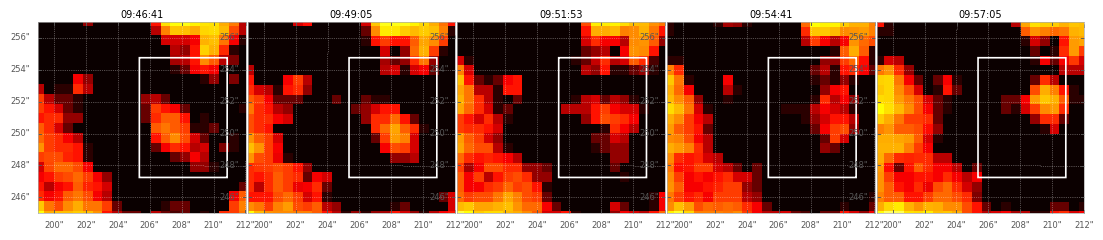

In [4]:
# Configure consistent visual style
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from sunpy.map import Map
from astropy.coordinates import SkyCoord, SkyOffsetFrame
import astropy.units as u
import matplotlib as mpl
from astropy.visualization import astropy_mpl_style # Import astropy_mpl_style

plt.style.use(astropy_mpl_style)
mpl.rcParams.update({
    "font.size": 7,
    "axes.linewidth": 0.5,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.major.width": 0.5,
    "ytick.major.width": 0.5,
})

flash_times = [
    "2010-12-11T09:46:41",
    "2010-12-11T09:49:05",
    "2010-12-11T09:51:53",
    "2010-12-11T09:54:41",
    "2010-12-11T09:57:05",
]

output_dir = "flash_fits_files"
maps = []

for flash_time in flash_times:
    file_path = os.path.join(output_dir, f"{flash_time}.fits")
    if not os.path.exists(file_path):
        print(f"Missing file for {flash_time}")
        continue

    hdul = fits.open(file_path)
    hdul[1].verify('fix')
    data = hdul[1].data
    header = hdul[1].header

    # Adjust headers
    header.update({
        'CUNIT1': 'arcsec',
        'CUNIT2': 'arcsec',
        'WAVEUNIT': 'angstrom',
        'DATE-OBS': flash_time,
        'T_OBS': flash_time,
        'CRPIX1': 2053.199951,
        'CRPIX2': 2043.339966,
        'CRVAL1': 0.000000,
        'CRVAL2': 0.000000,
        'CDELT1': 0.609373,
        'CDELT2': 0.609373,
    })

    aia_map = Map(data, header)
    maps.append((flash_time, aia_map))

# Set up figure
fig, axes = plt.subplots(1, len(maps), figsize=(2.7 * len(maps), 3.5),
                         subplot_kw={'projection': maps[0][1].wcs})

for i, (flash_time, aia_map) in enumerate(maps):
    ax = axes[i]

    # Plot map with fixed color limits
    aia_map.plot(axes=ax, cmap='hot', vmin=100, vmax=480, title=False)

    # Draw white rectangle
    center_coord = SkyCoord(208.1 * u.arcsec, 251.0 * u.arcsec, frame=aia_map.coordinate_frame)
    width = 5.5 * u.arcsec
    height = 7.5 * u.arcsec
    offset_frame = SkyOffsetFrame(origin=center_coord)
    rectangle = SkyCoord(lon=[-1/2, 1/2] * width, lat=[-1/2, 1/2] * height, frame=offset_frame)
    aia_map.draw_quadrangle(rectangle, axes=ax, edgecolor="white", linestyle="-", linewidth=1.2)

    # Set zoom region (match paper)
    bottom_left = SkyCoord(199 * u.arcsec, 245 * u.arcsec, frame=aia_map.coordinate_frame)
    top_right = SkyCoord(212 * u.arcsec, 257 * u.arcsec, frame=aia_map.coordinate_frame)
    pix_bl = aia_map.world_to_pixel(bottom_left)
    pix_tr = aia_map.world_to_pixel(top_right)
    ax.set_xlim(pix_bl.x.value, pix_tr.x.value)
    ax.set_ylim(pix_bl.y.value, pix_tr.y.value)

    # Format ticks
    ax.coords[0].set_ticks(spacing=2 * u.arcsec)
    ax.coords[1].set_ticks(spacing=2 * u.arcsec)
    ax.coords[0].set_axislabel("")
    ax.coords[1].set_axislabel("")
    ax.tick_params(labelsize=6, length=2.5, width=0.5)

    # Panel title (time only)
    ax.set_title(flash_time[11:], fontsize=7, pad=3)

# Clean layout
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.savefig("AIA_1600_flash_panels_REPLICA_FINAL.png", dpi=600, bbox_inches="tight")
plt.show()